# TP1: SERIES TEMPORELLES

Realised by RUDY TCHAMBA TCHAPTCHE ITIEL 21T2981

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("/home/redeus/Downloads/annual_rainfall_dallas.csv", index_col='Year', parse_dates=True)

In [3]:
df.head()

,Total
Year,
2019-01-01,34.52
2018-01-01,55.97
2017-01-01,36.62
2016-01-01,35.48
2015-01-01,62.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2019-01-01 to 1899-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [5]:
df.shape

(121, 1)

### QUESTION 1

In [6]:
# la moyenne
np.mean(df['Total'])

33.32776859504133

In [7]:
# la variance
np.std(df['Total'])**2

83.69304873984021

In [8]:
# l'ecratype
np.std(df['Total'])

9.148390499964473

In [9]:
df.describe()

,Total
count,121.000000
mean,33.327769
std,9.186430
min,17.910000
25%,26.440000
50%,33.140000
75%,39.290000
max,62.610000


### QUESTION 2

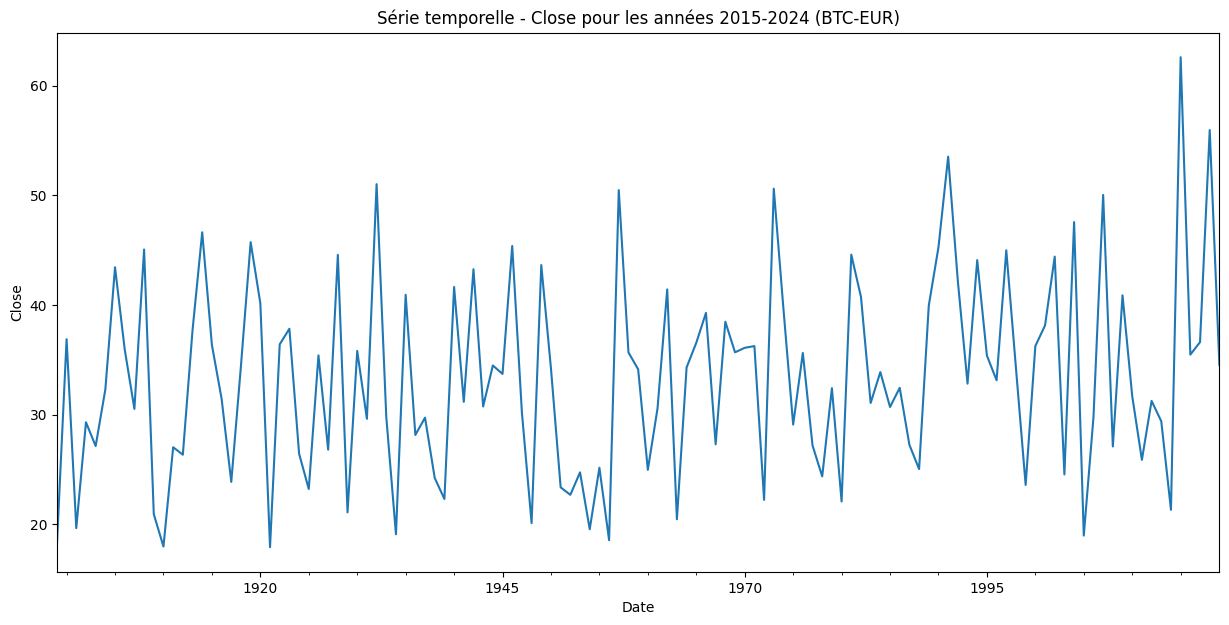

In [10]:
df['Total'].plot(figsize=(15, 7))
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Série temporelle - Close pour les années 2015-2024 (BTC-EUR)')
plt.show()

### QUESTION 3

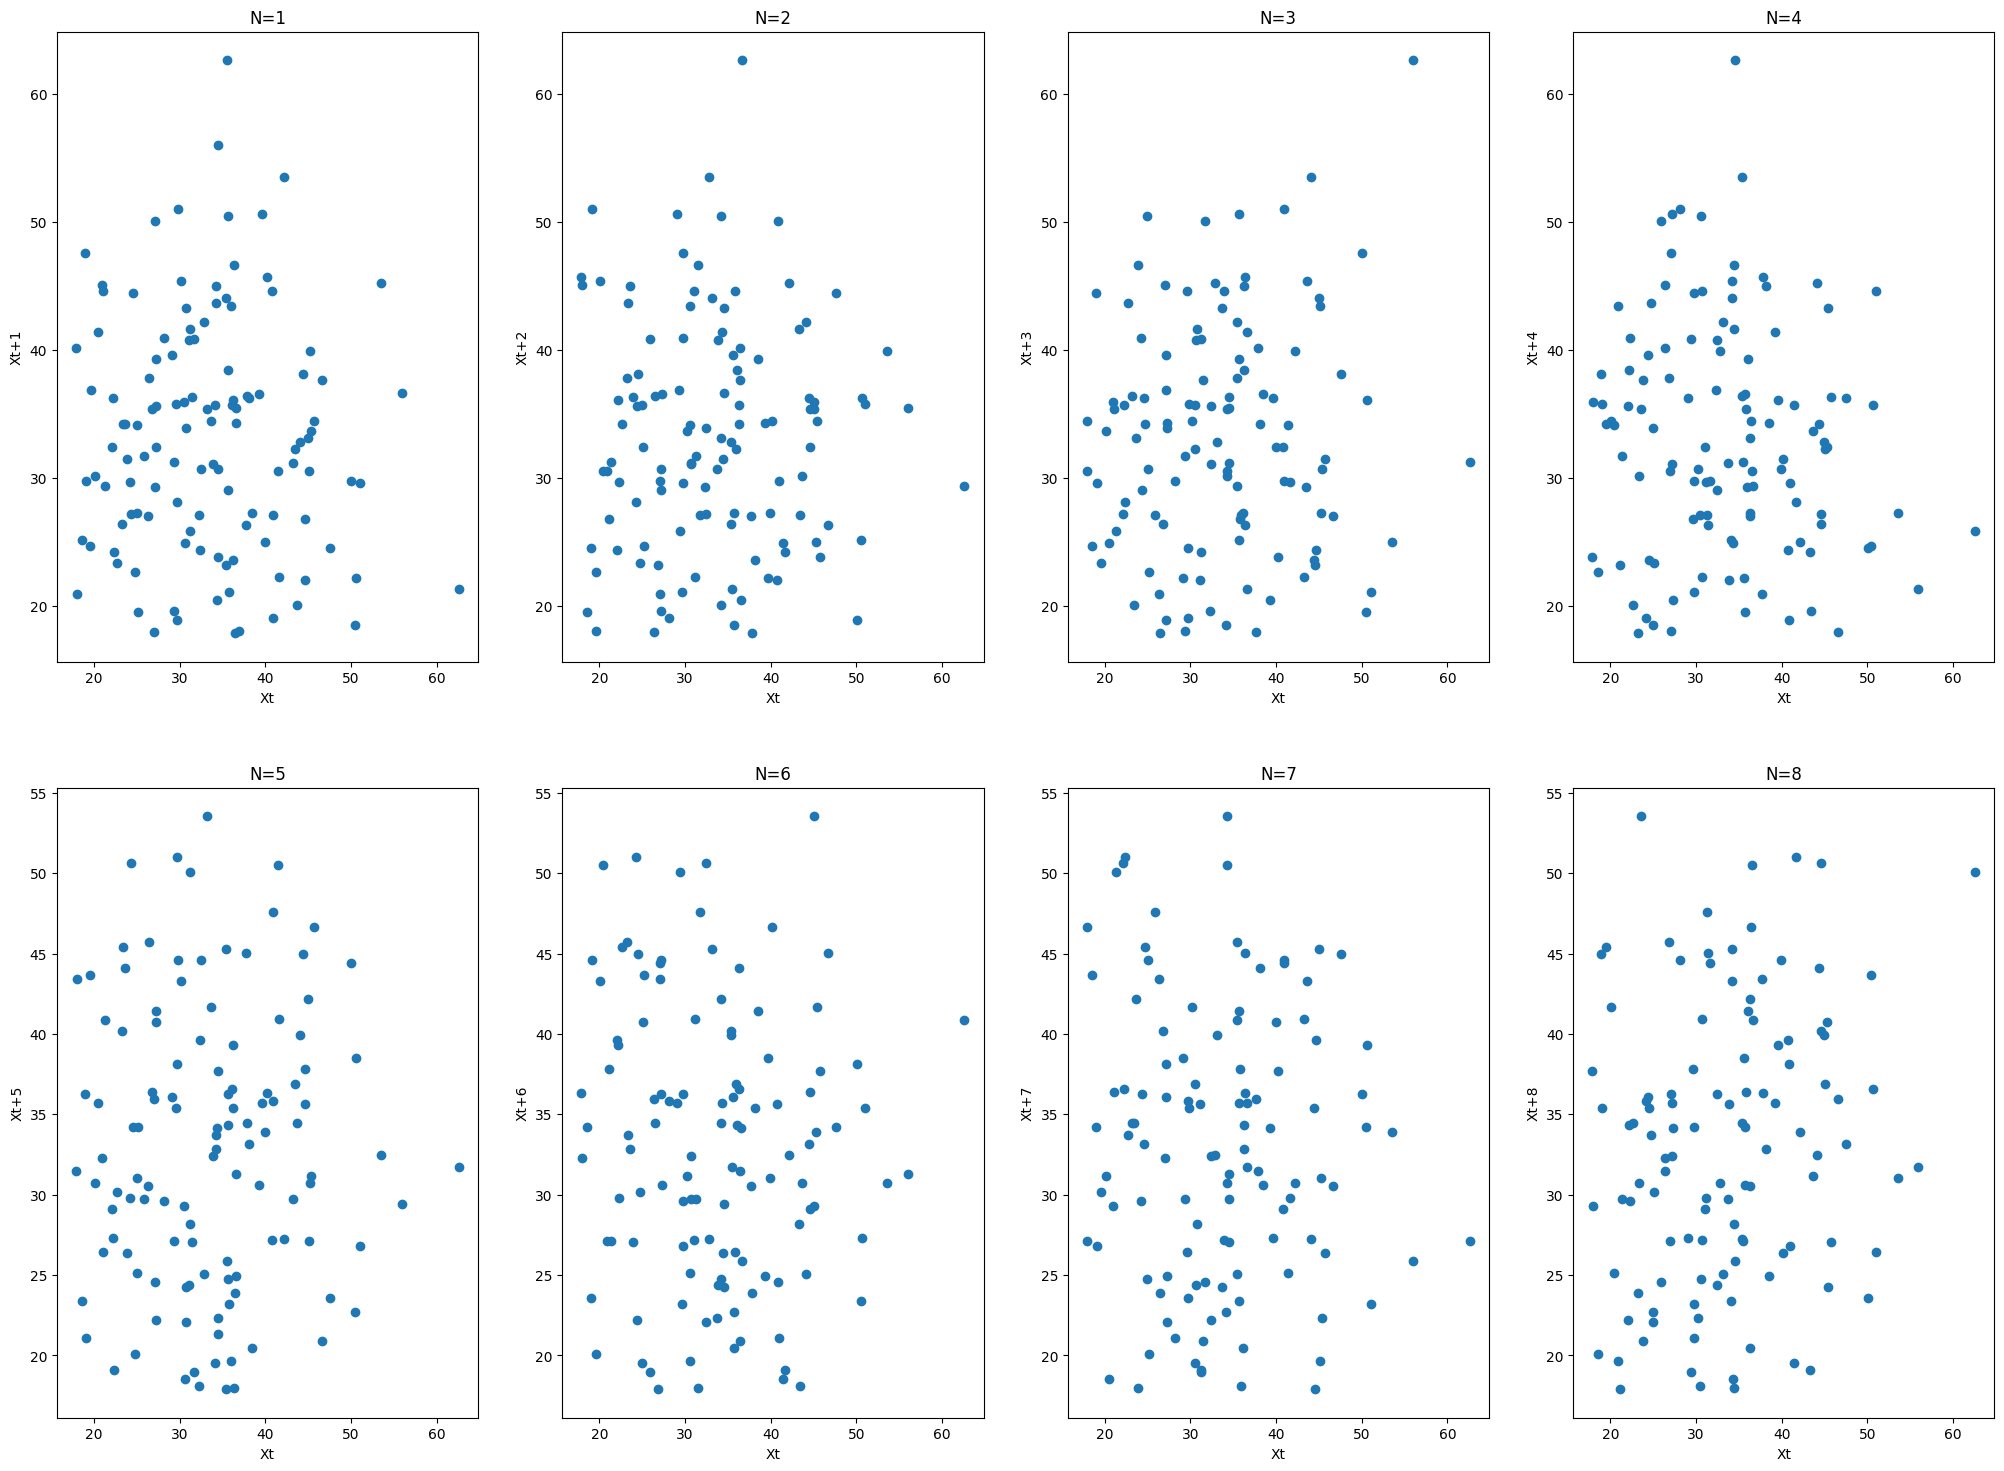

In [11]:
# REPRESENTATION DU NUAGE DE POINTS
plt.figure(figsize=[25,18])
for N in range(1,9):
    plt.subplot(2,4,N)
    debut=0
    fin=121
    plt.scatter(df['Total'][debut:fin-N], df['Total'][debut+N:fin])
    plt.xlabel("Xt")
    plt.ylabel(f"Xt+{N}")
    plt.title(f"N={N}")
plt.show()

### QUESTION 4

In [12]:
#CALCUL DE L'AUTO-CONVARIANCE-EMPIRIQUE
def auto_cov(data, K, moy):
    debut=0
    fin=len(data)
    Xt=data[debut:fin-K]
    Xt_k=data[debut+K:fin]

    cov=0
    for i in range(fin-K):
        cov+=(Xt[i]-moy)*(Xt_k[i]-moy)
    return cov/(fin-K)

In [13]:
def auto_cor(data, K):
    moy=np.mean(data)
    cov_0=auto_cov(data, 0, moy)
    cov_K=auto_cov(data, K, moy)
    return cov_K/cov_0

In [14]:
from tqdm import tqdm
auto_cor_all=list()
data=list(df['Total'])
for i in tqdm(range(1, 51)):
    auto_cor_all.append(auto_cor(data, i))

100%|██████████| 50/50 [00:00<00:00, 2870.02it/s]


<BarContainer object of 50 artists>

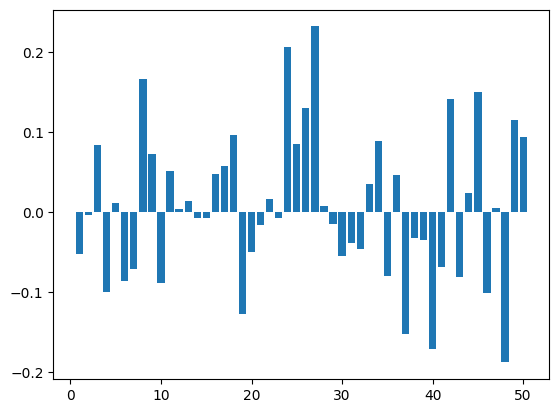

In [15]:
indexes=[i for i in range(1,51)]
plt.bar(indexes,auto_cor_all)

### QUESTION 5

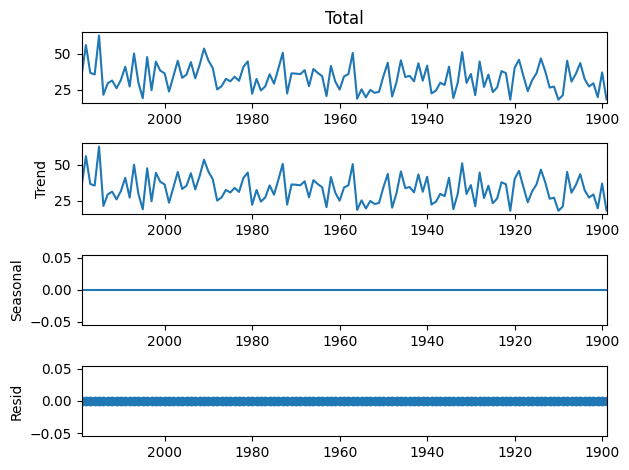

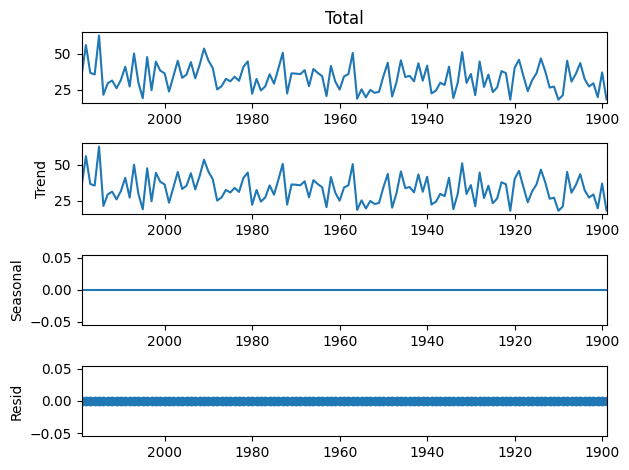

In [16]:
import statsmodels.api as sm

tsb = sm.tsa.seasonal_decompose(df['Total'])
tsb.plot()